In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
!pip install --pre pycaret &> /dev/null


tweet = pd.read_csv('/content/twitter.csv')
tweet.head(25)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


# New section

In [ ]:
tweet["labels"] = tweet["class"].map({0: "Hate Speech", 1: "Offensive Language", 2: "No Hate or  Offensive language"})
tweet.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate or Offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [ ]:
tweet = tweet[["tweet", "labels"]]
tweet.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate or Offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [ ]:
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
tweet["tweet"] = tweet["tweet"].apply(clean)
tweet.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate or Offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language


In [ ]:
x = np.array(tweet["tweet"])
y = np.array(tweet["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = classifier.predict(data)
print(output)

Creating a model to create predictions


In [ ]:
from pycaret.classification import *
from pycaret.datasets import get_data
s = setup(data = tweet ,target = 'labels')
rf_model = create_model('rf')

,Description,Value
0,Session id,8403
1,Target,labels
2,Target type,Multiclass
3,Target mapping,"Hate Speech: 0, No Hate or Offensive language: 1, Offensive Language: 2"
4,Original data shape,"(24783, 2)"
5,Transformed data shape,"(24783, 2)"
6,Transformed train set shape,"(17348, 2)"
7,Transformed test set shape,"(7435, 2)"
8,Categorical features,1
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7769,0.5052,0.7769,0.8268,0.6817,0.0166,0.0915
1,0.7758,0.5040,0.7758,0.7685,0.6790,0.0082,0.0636
2,0.7769,0.5056,0.7769,0.8268,0.6817,0.0166,0.0915
3,0.7746,0.5046,0.7746,0.7678,0.6769,0.0041,0.0449
4,0.7746,0.5038,0.7746,0.7678,0.6769,0.0041,0.0449
5,0.7764,0.5070,0.7764,0.8265,0.6809,0.0166,0.0914
6,0.7752,0.5041,0.7752,0.8258,0.6782,0.0084,0.0657
7,0.7741,0.5015,0.7741,0.5992,0.6755,0.0000,0.0000
8,0.7745,0.5018,0.7745,0.5999,0.6761,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
sm = save_model(rf_model, 'rfModelFile')

Transformation Pipeline and Model Successfully Saved


In [ ]:
rf_model = load_model('rfModelFile')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
newdataset = get_data("twitter").iloc[:10]

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
predictions = predict_model(rf_model, data = tweet)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7763,0.5083,0,0,0,0.0155,0.0830


,tweet,labels,prediction_label,prediction_score
0,rt mayasolov woman shouldnt complain clean ho...,No Hate or Offensive language,Offensive Language,0.7744
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language,Offensive Language,0.7744
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language,Offensive Language,0.7744
3,rt cganderson vivabas look like tranni,Offensive Language,Offensive Language,0.7744
4,rt shenikarobert shit hear might true might f...,Offensive Language,Offensive Language,0.7744
...,...,...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language,Offensive Language,0.7744
24779,youv gone broke wrong heart babi drove redneck...,No Hate or Offensive language,Offensive Language,0.7744
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language,Offensive Language,0.7744
24781,youu got wild bitch tellin lie,Offensive Language,Offensive Language,0.7744


In [ ]:
predictions.to_csv("Predictions.csv")

In [ ]:
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 67.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc8 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


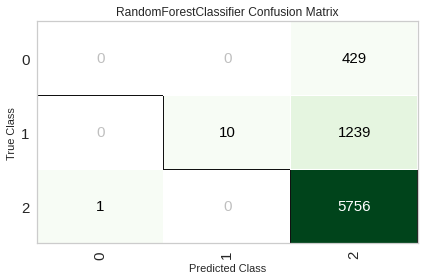

In [ ]:
plot_model(rf_model, plot ='confusion_matrix')

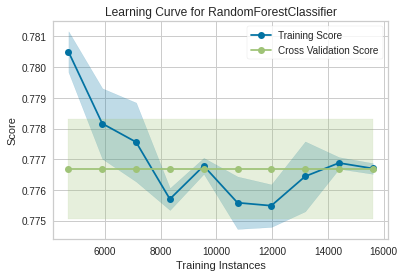

In [ ]:
plot_model(rf_model, plot='learning')

In [ ]:
stopword=set(stopwords.words('english'))
print (stopword)

{'for', 'and', 'y', "haven't", "you're", 'or', 'themselves', 'being', 'haven', 'not', 'who', 'nor', 'ain', 'ourselves', 'above', 'between', 'herself', 'all', "hadn't", 'this', 'was', 'against', 'him', 'that', 'yours', 'same', "you'll", 'mustn', 'has', "mustn't", "it's", 'll', 'does', 'those', 'before', "needn't", 'so', 'just', 'don', 'some', 'when', 'it', 'hers', 'very', "weren't", 'can', 'in', "she's", 'after', 'both', "don't", 'an', 'than', 'any', 's', 'her', 'further', 'will', 'couldn', 'she', 'am', 'wasn', 'aren', 'won', 'which', 'now', 'of', 'we', 'o', 'during', 'if', 'while', 'their', 'mightn', 'a', 'hadn', "won't", 'myself', 'other', 'm', 'isn', "doesn't", 'but', 'ma', 'wouldn', 'is', 'no', "wouldn't", 'up', 'didn', 'again', 're', 'through', "that'll", 'my', 've', 'into', 'the', 'theirs', 'down', 'have', 'weren', 'these', 'off', 'too', 'what', 'here', 'been', 'as', "aren't", 'your', 'having', 'did', 'doesn', "isn't", 'needn', 'they', 'shouldn', 'with', 't', 'why', 'under', 'how'

In [ ]:
from pycaret.classification import *
from pycaret.datasets import get_data
s = setup(data = tweet ,target = 'labels')
ridge_model = create_model('ridge')

,Description,Value
0,Session id,5584
1,Target,labels
2,Target type,Multiclass
3,Target mapping,"Hate Speech: 0, No Hate or Offensive language: 1, Offensive Language: 2"
4,Original data shape,"(24783, 2)"
5,Transformed data shape,"(24783, 2)"
6,Transformed train set shape,"(17348, 2)"
7,Transformed test set shape,"(7435, 2)"
8,Categorical features,1
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7746,0.0000,0.7746,0.6842,0.6773,0.0031,0.0240
1,0.7758,0.0000,0.7758,0.7685,0.6790,0.0082,0.0636
2,0.7752,0.0000,0.7752,0.7681,0.6776,0.0041,0.0450
3,0.7741,0.0000,0.7741,0.5992,0.6755,0.0000,0.0000
4,0.7752,0.0000,0.7752,0.7124,0.6784,0.0097,0.0616
5,0.7752,0.0000,0.7752,0.7124,0.6784,0.0097,0.0616
6,0.7758,0.0000,0.7758,0.7268,0.6798,0.0137,0.0758
7,0.7746,0.0000,0.7746,0.6837,0.6771,0.0056,0.0437
8,0.7762,0.0000,0.7762,0.7687,0.6802,0.0123,0.0779


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
ridgem=save_model(ridge_model, 'ridgeModelFile')

Transformation Pipeline and Model Successfully Saved


In [ ]:
ridge_model = load_model('ridgeModelFile')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new= get_data("twitter").iloc[:10]

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
prediction = predict_model(ridge_model, data = tweet)
prediction

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7759,0,0,0,0,0.0134,0.0721


,tweet,labels,prediction_label
0,rt mayasolov woman shouldnt complain clean ho...,No Hate or Offensive language,Offensive Language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language,Offensive Language
...,...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No Hate or Offensive language,Offensive Language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language,Offensive Language


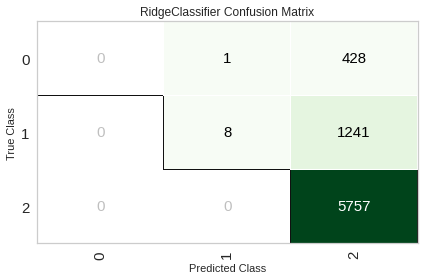

In [ ]:
plot_model(ridge_model, plot ='confusion_matrix')

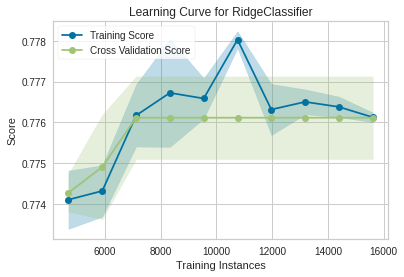

In [ ]:
plot_model(ridge_model, plot='learning')

In [ ]:
from pycaret.classification import *
from pycaret.datasets import get_data
s = setup(data = tweet ,target = 'labels')
svm_model = create_model('svm')

,Description,Value
0,Session id,6050
1,Target,labels
2,Target type,Multiclass
3,Target mapping,"Hate Speech: 0, No Hate or Offensive language: 1, Offensive Language: 2"
4,Original data shape,"(24783, 2)"
5,Transformed data shape,"(24783, 2)"
6,Transformed train set shape,"(17348, 2)"
7,Transformed test set shape,"(7435, 2)"
8,Categorical features,1
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7769,0.0000,0.7769,0.7692,0.6817,0.0163,0.0900
1,0.7758,0.0000,0.7758,0.7129,0.6792,0.0097,0.0617
2,0.7746,0.0000,0.7746,0.6001,0.6763,0.0000,0.0000
3,0.7752,0.0000,0.7752,0.7676,0.6782,0.0082,0.0635
4,0.7758,0.0000,0.7758,0.7685,0.6796,0.0122,0.0778
5,0.7741,0.0000,0.7741,0.5992,0.6755,0.0000,0.0000
6,0.7746,0.0000,0.7746,0.6840,0.6771,0.0056,0.0437
7,0.7746,0.0000,0.7746,0.6840,0.6771,0.0056,0.0437
8,0.7745,0.0000,0.7745,0.6564,0.6774,0.0046,0.0294


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
svmm=save_model(svm_model, 'svmModelFile')

Transformation Pipeline and Model Successfully Saved


In [ ]:
svm_model = load_model('svmModelFile')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
newsvm= get_data("twitter").iloc[:10]

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
predictionsvm= predict_model(svm_model, data = tweet)
predictionsvm

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7760,0,0,0,0,0.0134,0.0752


,tweet,labels,prediction_label
0,rt mayasolov woman shouldnt complain clean ho...,No Hate or Offensive language,Offensive Language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language,Offensive Language
...,...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No Hate or Offensive language,Offensive Language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language,Offensive Language


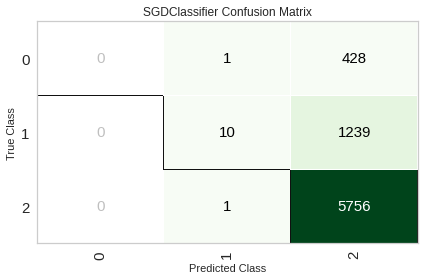

In [ ]:
plot_model(svm_model, plot ='confusion_matrix')

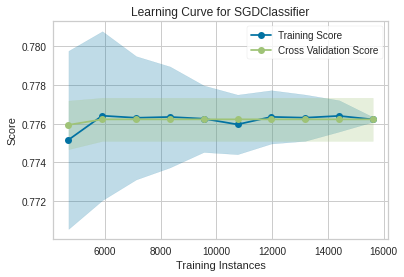

In [ ]:
plot_model(svm_model, plot='learning')